In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.io as sio

# K-means

## Load data

         X1        X2
0  1.842080  4.607572
1  5.658583  4.799964
2  6.352579  3.290854
3  2.904017  4.612204
4  3.231979  4.939894


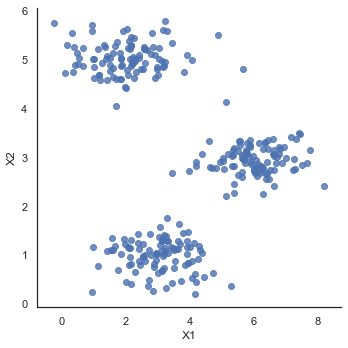

In [57]:
mat = sio.loadmat('data_/ex7data2.mat')
data2 = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
print(data2.head())

sns.set(context="notebook", style="white")
sns.lmplot('X1', 'X2', data=data2, fit_reg=False)
plt.show()

## Functions

In [65]:
def random_init(data, k):
    return data.sample(k).to_numpy()

def find_cluster(x, centroids):
    index = np.argmin(np.linalg.norm(x - centroids,axis=1))
    return index

def assign_cluster(data, centroids):
    return np.apply_along_axis(lambda x: find_cluster(x, centroids),
                       axis=1,
                       arr=data.values)

def update_centroids(data, C):
    return data.groupby('C', as_index=False).mean().sort_values(by='C').drop('C', axis=1).values

## Cluster assginment

In [17]:
init_centroids = random_init(data2, 3)
init_centroids

array([[1.70725482, 4.04231479],
       [5.69797866, 2.94977132],
       [6.64078939, 2.41068839]])

In [25]:
x = np.array([5,1])

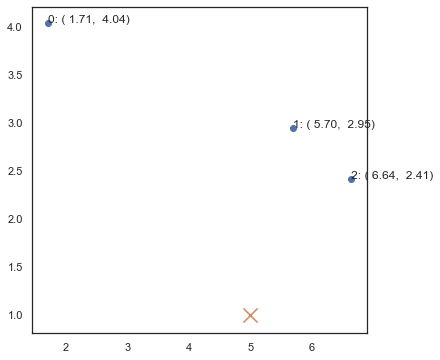

In [26]:
plt.figure(figsize=(6,6))
plt.scatter(init_centroids[:,0], init_centroids[:, 1])

for i, node in enumerate(init_centroids):
    plt.annotate(f"{i}: ({node[0] : .2f}, {node[1] : .2f})", node)
plt.scatter(x[0], x[1], marker='x', s=200)
plt.show()

### Find closest cluster

In [27]:
find_cluster(x, init_centroids)

1

### Epoch cluster assigning

In [58]:
data2['C'] = assign_cluster(data2, init_centroids)

In [59]:
data2.head()

,X1,X2,C
0,1.842080,4.607572,0
1,5.658583,4.799964,1
2,6.352579,3.290854,1
3,2.904017,4.612204,0
4,3.231979,4.939894,0


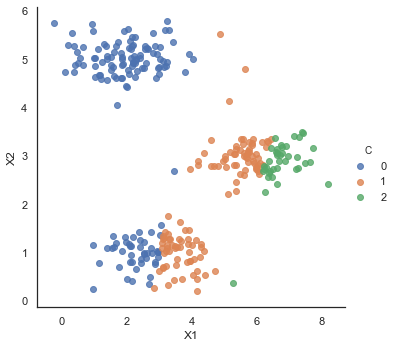

In [60]:
sns.lmplot('X1', 'X2', hue='C', data=data2, fit_reg=False)
plt.show()

### Update new centroids

In [80]:
update_centroids(data2, data2.C)

array([[2.06194476, 3.74683323],
       [4.6475205 , 2.09446198],
       [6.78545462, 2.85985132]])

In [71]:
data2.head()

,X1,X2,C
0,1.842080,4.607572,0
1,5.658583,4.799964,1
2,6.352579,3.290854,1
3,2.904017,4.612204,0
4,3.231979,4.939894,0
